<a href="https://colab.research.google.com/github/ZNisaAkkilic/AI_DataScience_Projects/blob/main/twitter_US_A%C4%B0RL%C4%B0NE_SENT%C4%B0EMNTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import plotly.express as px
import geopandas as gpd
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [ ]:
data.shape

(14640, 15)

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
sen_count=data.groupby(['airline','airline_sentiment' ]).size().unstack()

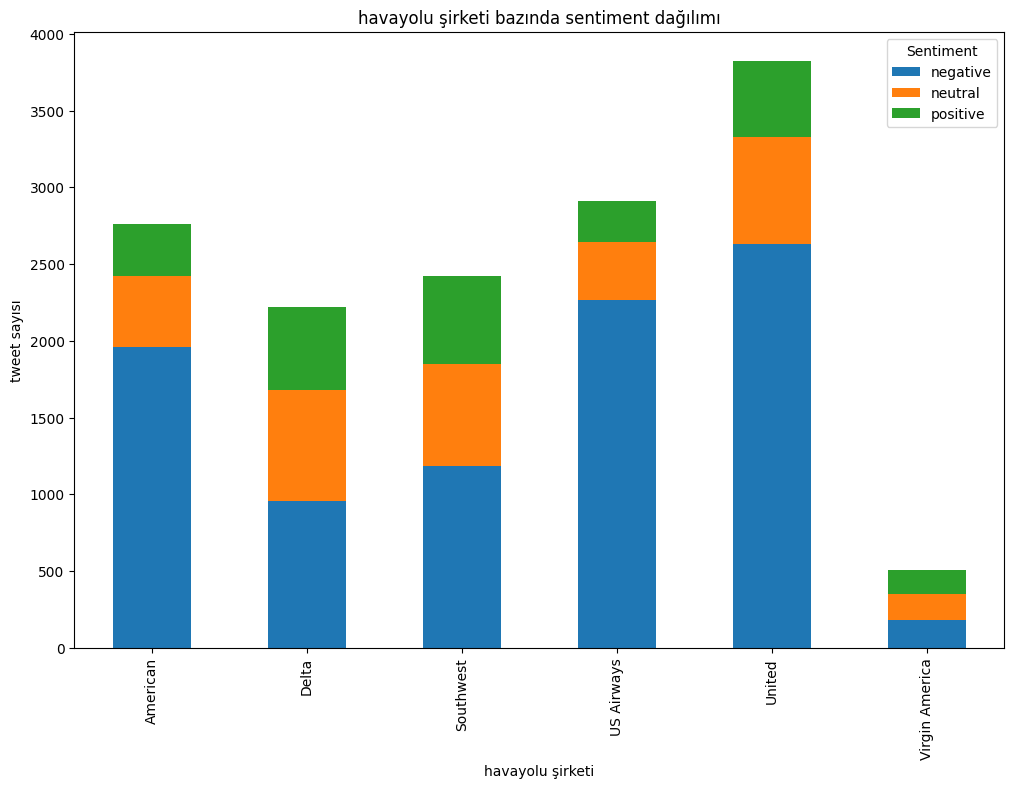

In [ ]:
sen_count.plot(kind='bar', stacked=True,figsize=(12,8))
plt.title('havayolu şirketi bazında sentiment dağılımı')
plt.xlabel('havayolu şirketi')
plt.ylabel('tweet sayısı')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
threshold=0.7

In [ ]:
data['sentiment_confidence_level']=['High' if x>=threshold else 'Low' for x in data['airline_sentiment_confidence']]

In [ ]:
conf_count=data.groupby(['airline', 'sentiment_confidence_level']).size().unstack()

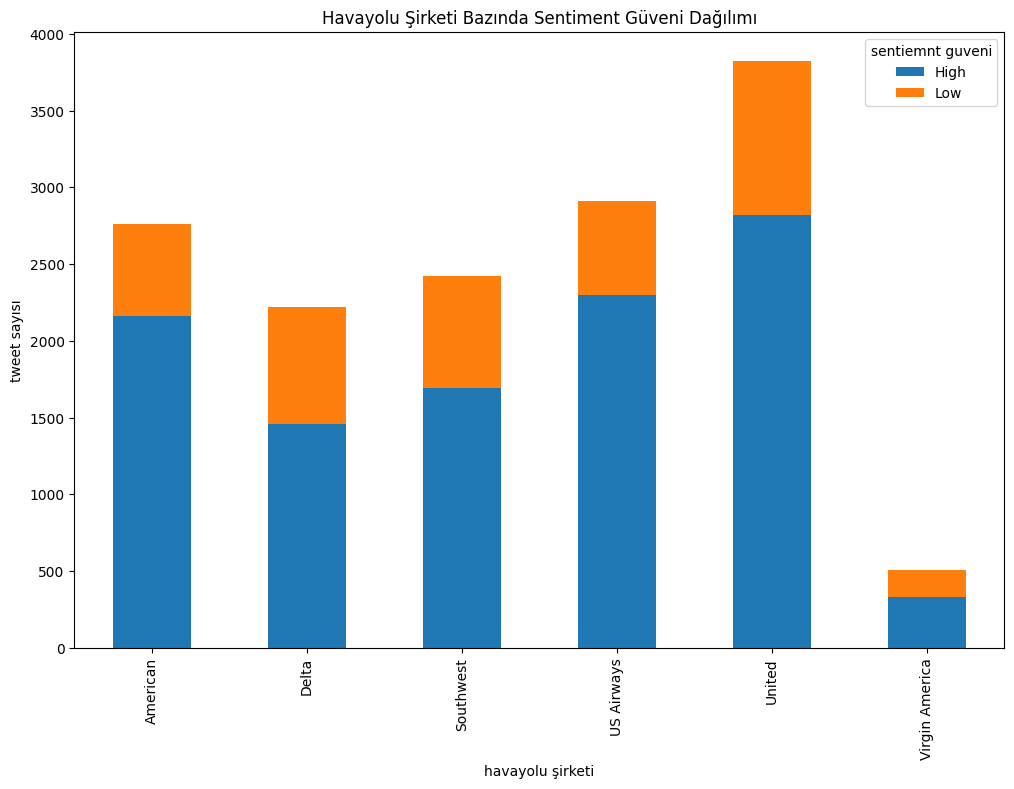

In [ ]:
conf_count.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Havayolu Şirketi Bazında Sentiment Güveni Dağılımı')
plt.xlabel('havayolu şirketi')
plt.ylabel('tweet sayısı')
plt.legend(title='sentiemnt guveni')
plt.show()

In [ ]:
#Hangi Havayolu Şirketleri Sentiment Güveni Açısından Daha Tutarlı?

In [ ]:
## Sentiment güveni oranlarını hesaplama
conf_rat=data.groupby('airline')['sentiment_confidence_level'].value_counts(normalize=True).unstack().fillna(0)

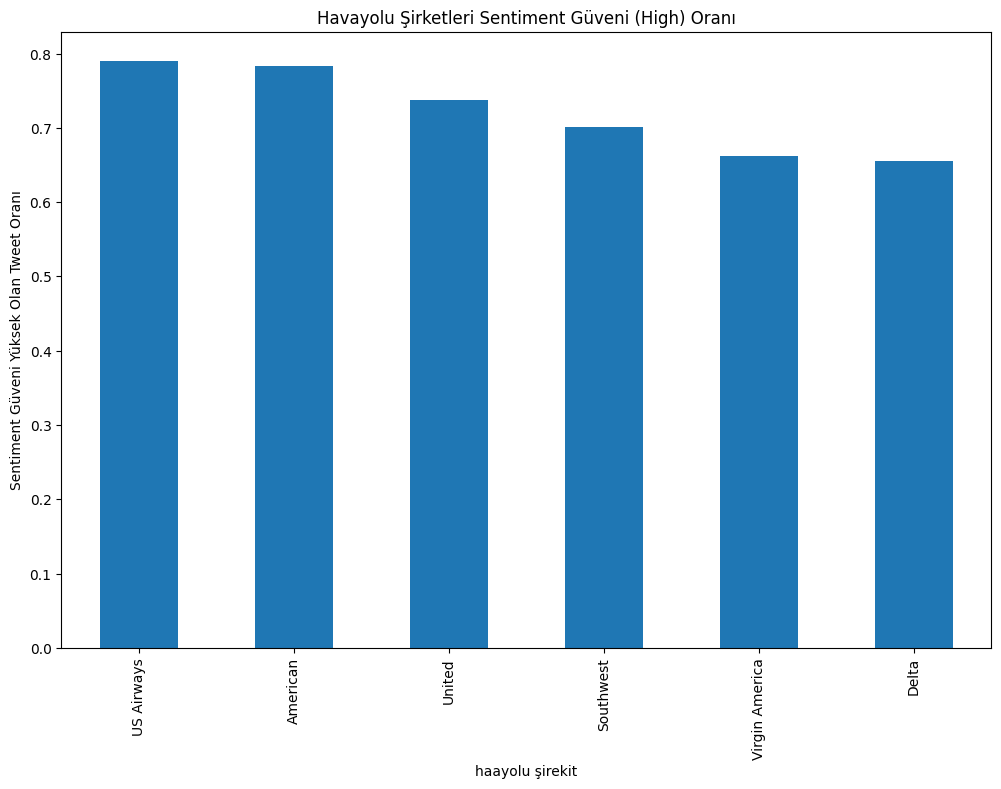

In [ ]:
## Havayolu şirketleri için sentiment güveni yüksek oranını sıralama
conf_rat['High'].sort_values(ascending=False).plot(kind='bar',figsize=(12,8))
plt.title('Havayolu Şirketleri Sentiment Güveni (High) Oranı')
plt.xlabel('haayolu şirekit')
plt.ylabel('Sentiment Güveni Yüksek Olan Tweet Oranı')
plt.show()


In [ ]:
# Sentiment güveni yüksek olan havayolu şirketleri
print(conf_rat['High'].sort_values(ascending=False))

airline
US Airways        0.789907
American          0.782892
United            0.737834
Southwest         0.700826
Virgin America    0.662698
Delta             0.655716
Name: High, dtype: float64


In [ ]:
# Belirli Bir Havayolu Şirketine Yönelik Sentiment Güveni Düşük Olan Tweetlerde Ortak Negatif Nedenler Var mı?

In [ ]:
airline='United'

In [ ]:
## Belirli bir havayolu şirketi için sentiment güveni düşük olan tweetlerin negatif nedenleri
air_low_conf_re=data[(data['airline']==airline) &  (data['sentiment_confidence_level']=='Low')]['negativereason'].value_counts()

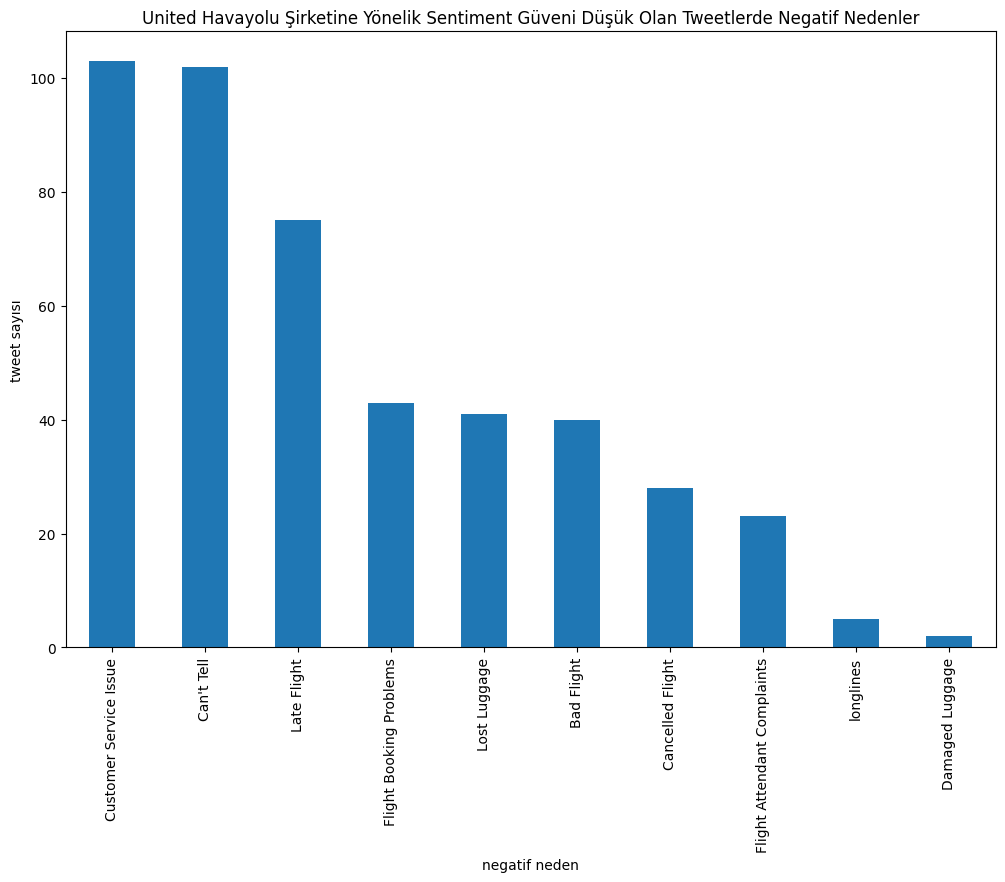

In [ ]:
air_low_conf_re.plot(kind='bar', figsize=(12,8))
plt.title(f'{airline} Havayolu Şirketine Yönelik Sentiment Güveni Düşük Olan Tweetlerde Negatif Nedenler')
plt.xlabel('negatif neden')
plt.ylabel('tweet sayısı')
plt.show()

In [ ]:
print(air_low_conf_re)

negativereason
Customer Service Issue         103
Can't Tell                     102
Late Flight                     75
Flight Booking Problems         43
Lost Luggage                    41
Bad Flight                      40
Cancelled Flight                28
Flight Attendant Complaints     23
longlines                        5
Damaged Luggage                  2
Name: count, dtype: int64


In [ ]:
# reetweet sayısnın- bulma
data_sır=data.sort_values(by='retweet_count', ascending=False)

In [ ]:
top_tweet=data_sır.head()

In [ ]:
top_tweet

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment_confidence_level
11596,567897883875217408,negative,1.0000,Late Flight,1.0000,US Airways,NaN,OBJ_3,NaN,44,@USAirways 5 hr flight delay and a delay when ...,NaN,2015-02-17 20:06:21 -0800,NaN,Eastern Time (US & Canada),High
11582,567909106553483264,negative,1.0000,Can't Tell,0.6608,US Airways,NaN,OBJ_3,NaN,32,@USAirways of course never again tho . Thanks ...,NaN,2015-02-17 20:50:56 -0800,NaN,Eastern Time (US & Canada),High
7132,569927288751587328,negative,1.0000,Can't Tell,1.0000,Delta,NaN,TatianaKing,NaN,31,STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY....,NaN,2015-02-23 10:30:29 -0800,"New York, NY",NaN,High
9999,569584057270575105,neutral,0.6593,NaN,NaN,US Airways,NaN,airliners2,NaN,28,@USAirways with this livery back in the day. h...,NaN,2015-02-22 11:46:36 -0800,Airports Around The World,Eastern Time (US & Canada),Low
5607,568869594531651584,positive,1.0000,NaN,NaN,Southwest,NaN,seattlefordguy,NaN,22,@SouthwestAir beautiful day in Seattle! http:/...,NaN,2015-02-20 12:27:35 -0800,"Bellevue, WA",Hawaii,High


In [ ]:
top_tweet_sent=top_tweet['airline_sentiment'].value_counts()

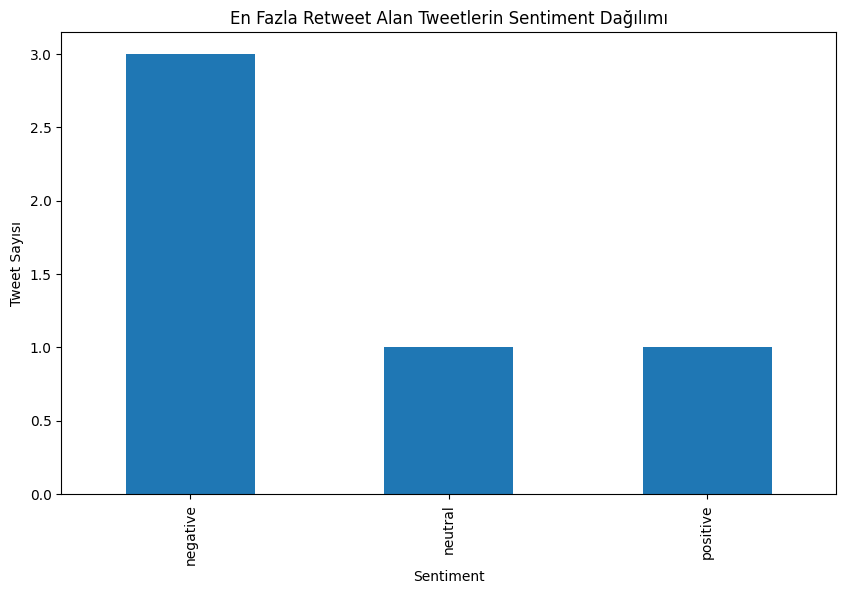

In [ ]:
top_tweet_sent.plot(kind='bar', figsize=(10,6))
plt.title('En Fazla Retweet Alan Tweetlerin Sentiment Dağılımı')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Sayısı')
plt.show()

In [ ]:
hihg_retweet=data[data['retweet_count']>50]

In [ ]:
hihg_retweet_sent=hihg_retweet['airline_sentiment'].value_counts()

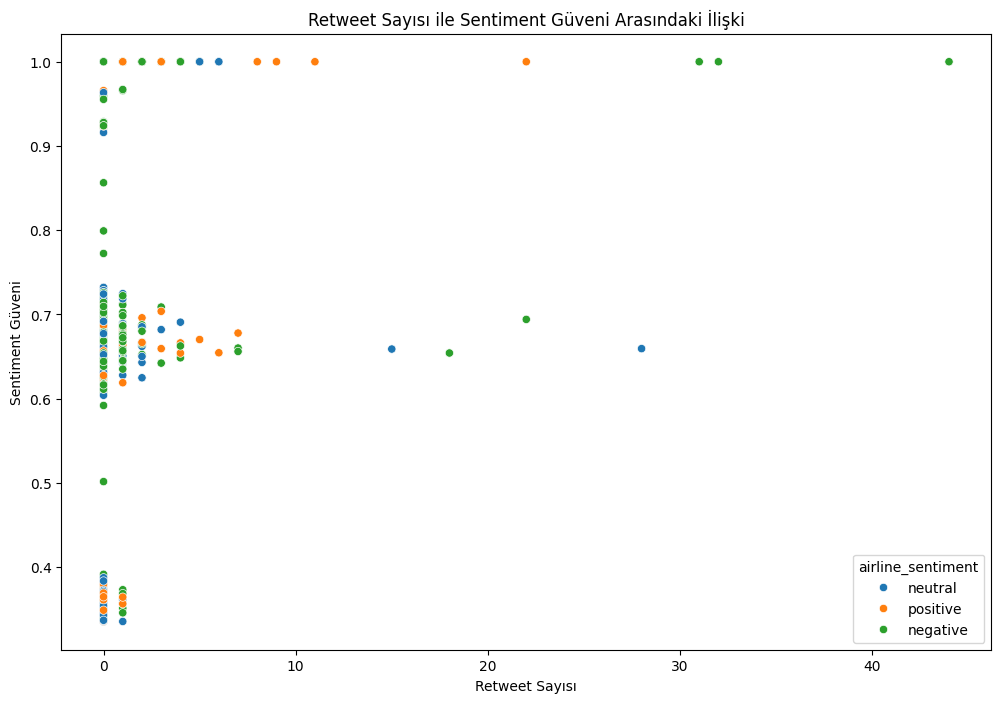

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='retweet_count', y='airline_sentiment_confidence', hue='airline_sentiment', data=data)
plt.title('Retweet Sayısı ile Sentiment Güveni Arasındaki İlişki')
plt.xlabel('Retweet Sayısı')
plt.ylabel('Sentiment Güveni')
plt.show()

In [ ]:
#Saat Bazında Tweet Analizi
# Zaman bilgilerini datetime formatına dönüştürme
data['tweet_created']=pd.to_datetime(data['tweet_created'])

In [ ]:
# Saat bilgilerini çıkarma
data['hour']=data['tweet_created'].dt.hour

In [ ]:

# Saat bazında sentiment dağılımı
hourly_sentiment=data.groupby(['hour', 'airline_sentiment']).size().unstack().fillna(0)

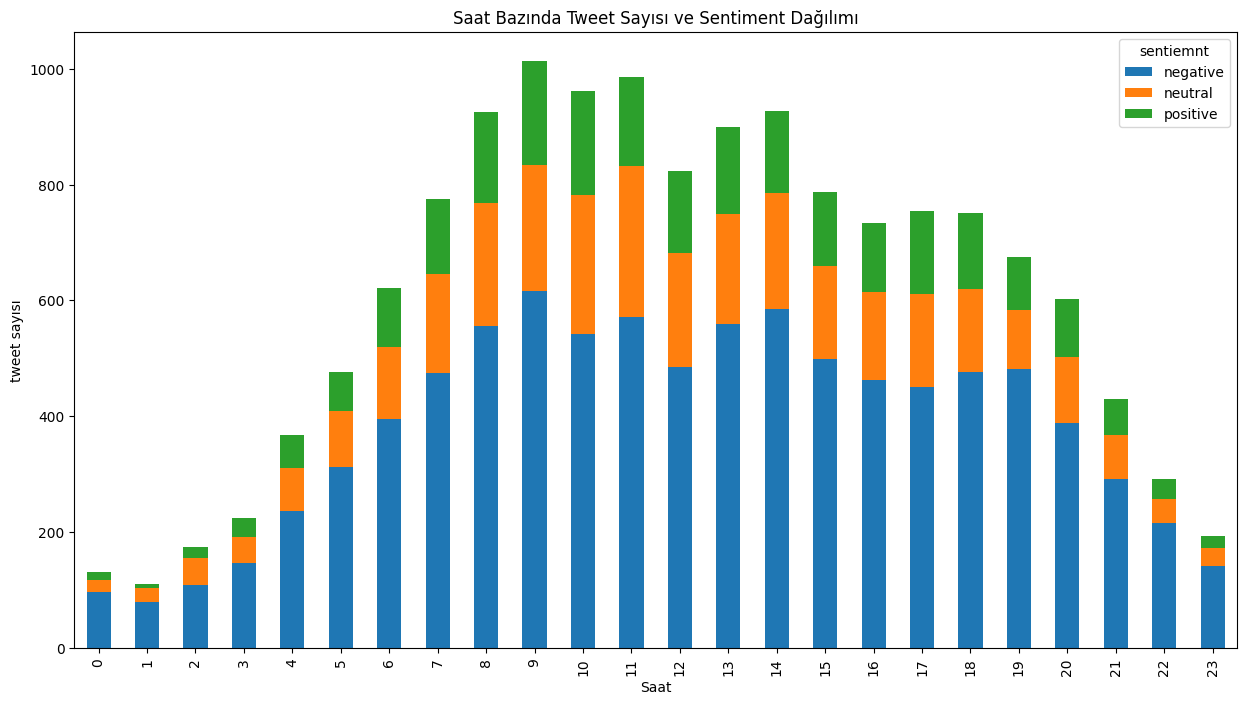

In [ ]:
hourly_sentiment.plot(kind='bar', stacked=True, figsize=(15,8))
plt.title('Saat Bazında Tweet Sayısı ve Sentiment Dağılımı')
plt.xlabel('Saat')
plt.ylabel('tweet sayısı')
plt.legend(title='sentiemnt')
plt.show()

In [ ]:
#Gün Bazında Tweet Analizi
data['day']=data['tweet_created'].dt.date

In [ ]:
# Gün bazında sentiment dağılımı
dailey_sentiment=data.groupby(['day', 'airline_sentiment']).size().unstack().fillna(0)

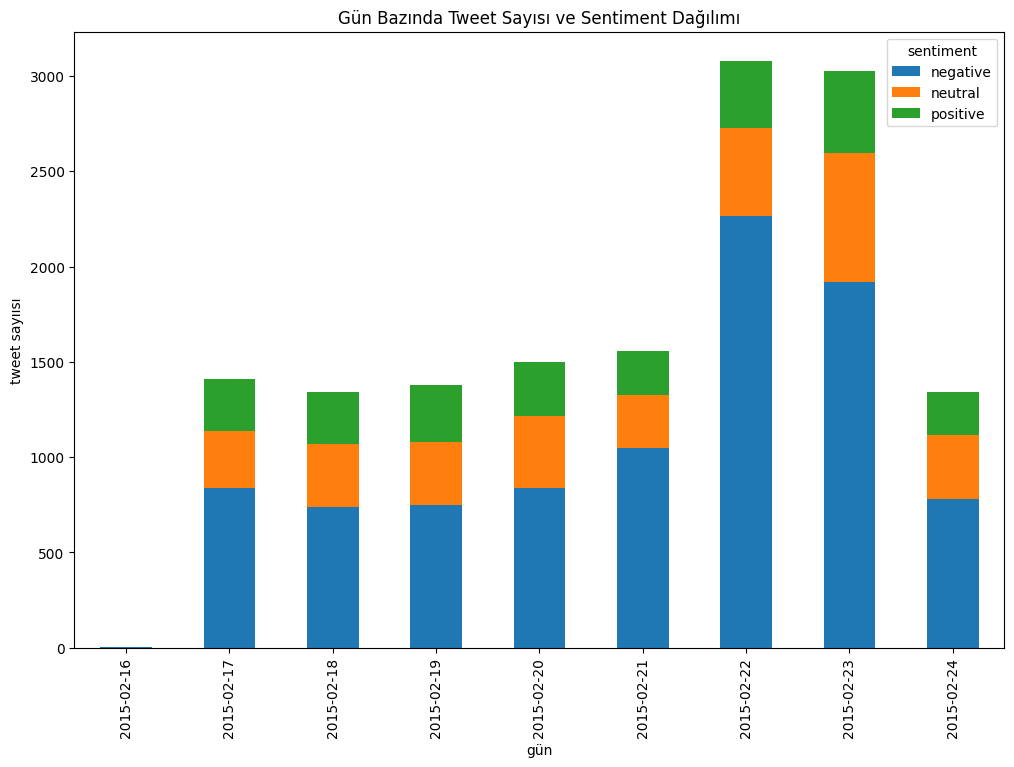

In [ ]:
dailey_sentiment.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Gün Bazında Tweet Sayısı ve Sentiment Dağılımı')
plt.xlabel('gün')
plt.ylabel('tweet sayıısı')
plt.legend(title='sentiment')

In [ ]:
#Kullanıcı Zaman Dilimi Bazında Sentiment Dağılımı
timezone_sentiment=data.groupby(['user_timezone', 'airline_sentiment']).size().unstack().fillna(0)

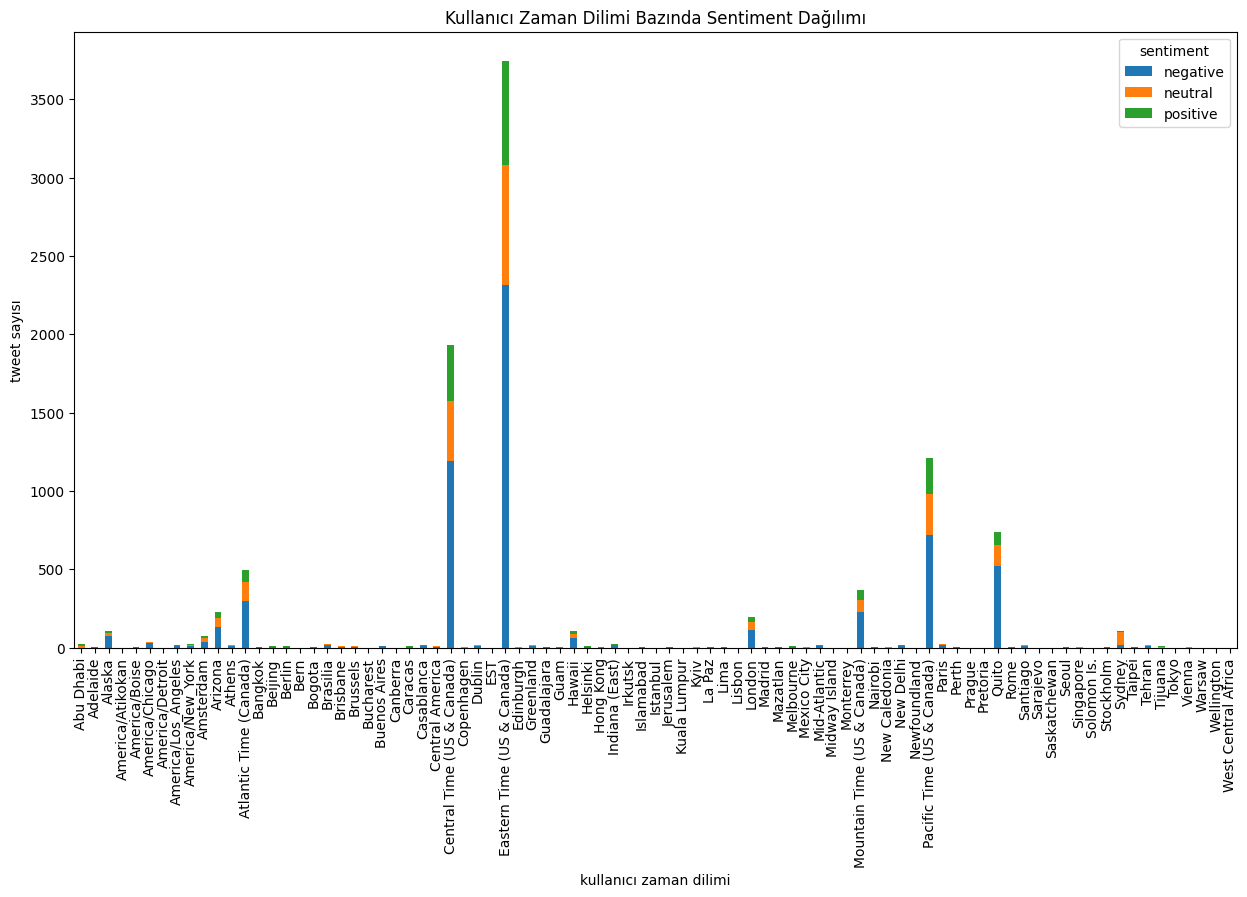

In [ ]:

timezone_sentiment.plot(kind='bar', stacked=True, figsize=(15,8))
plt.title('Kullanıcı Zaman Dilimi Bazında Sentiment Dağılımı')
plt.xlabel('kullanıcı zaman dilimi')
plt.ylabel('tweet sayısı')
plt.legend(title='sentiment')
plt.show()

In [ ]:
#Kullanıcı Zaman Dilimi ve Zaman Bazında Sentiment Dağılımı
# Kullanıcı zaman dilimi ve saat bazında sentiment dağılımı
timezone_hourly_sentiment=data.groupby(['user_timezone', 'hour', 'airline_sentiment']).size().unstack().fillna(0)


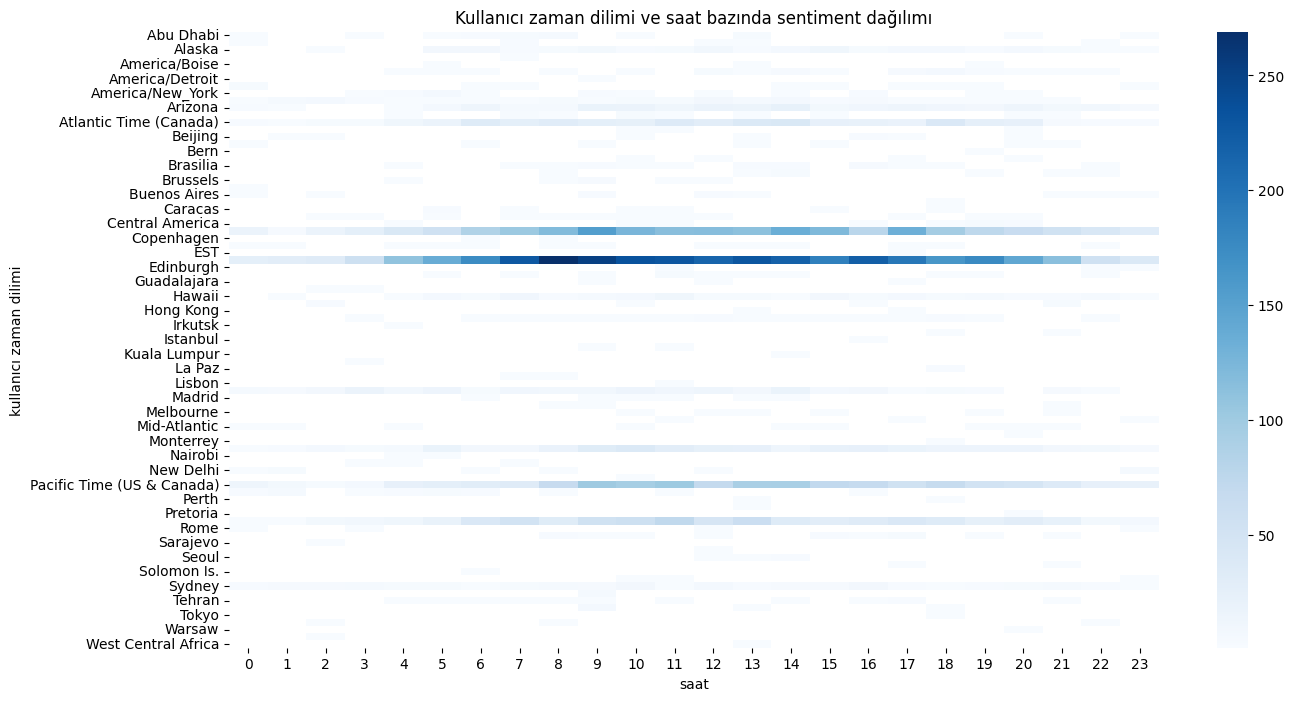

In [ ]:
fig, ax=plt.subplots(figsize=(15,8))
sns.heatmap(timezone_hourly_sentiment.sum(axis=1).unstack(), cmap='Blues',ax=ax)
plt.title('Kullanıcı zaman dilimi ve saat bazında sentiment dağılımı')
plt.xlabel('saat')
plt.ylabel('kullanıcı zaman dilimi')
plt.show()

In [ ]:
pip install folium geopandas

In [ ]:
# Koordinatları içeren tweetleri filtreleme
data=data.dropna(subset=['tweet_coord'])

In [ ]:
# Koordinatları uygun formata getirme
data['tweet_coord']=data['tweet_coord'].apply(eval)

In [ ]:
# Harita oluşturma
map_tweets=folium.Map(location=[40.7128, -74.0060],zoom_start=4)

In [ ]:
# Koordinatları haritaya ekleme
for coord in data['tweet_coord']:
  folium.CircleMarker(location=coord, radius=3, color='blue', fillna=True).add_to(map_tweets)

In [ ]:
# Haritayı gösterme
map_tweets.save('tweets_map.html')

In [ ]:
pip install plotly

In [ ]:
df = {'tweet_coord': ['[37.7749, -122.4194]', '[40.7128, -74.0060]', '[34.0522, -118.2437]']}

In [ ]:
data = pd.DataFrame(df)

In [ ]:
data[['latitude', 'longitude']] = pd.DataFrame(data['tweet_coord'].tolist(), index=data.index)

In [ ]:
fig = px.scatter_geo(data,
                     lat='latitude',
                     lon='longitude',
                     scope='world',
                     title='Tweet Konumları Dünya Haritası',
                     hover_name='tweet_coord')

In [ ]:
fig.show()

In [ ]:
# Koordinatları içeren tweetleri ve sentimentleri içeren yeni bir DataFrame oluşturma
data_coords=data[['tweet_coord','airline_sentiment']].dropna()

In [ ]:
data_coords['latitude']=data_coords['tweet_coord'].apply(lambda x:x[0])
data_coords['longitude']=data_coords['tweet_coord'].apply(lambda x: x[1])

In [ ]:
pip install wordcloud nltk textblob


In [ ]:
# Tweet metinlerini pozitif, negatif ve nötr olarak ayırma
positive_texts=data[data['airline_sentiment']== 'positive']['text']
negative_texts=data[data['airline_sentiment']== 'negative']['text']
neutral_texts =  data[data['airline_sentiment']== 'neutral']['text']

In [ ]:
# Metinleri birleştirme
positive_text= ''.join(positive_tweets)
negative_texts=' '.join(negative_tweets)
neutral_texts=' '.join(neutral_tweet)

In [ ]:
# Kelime bulutları oluşturma
positive_wordcloud=WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud=WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
neutral_wordcloud=WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)

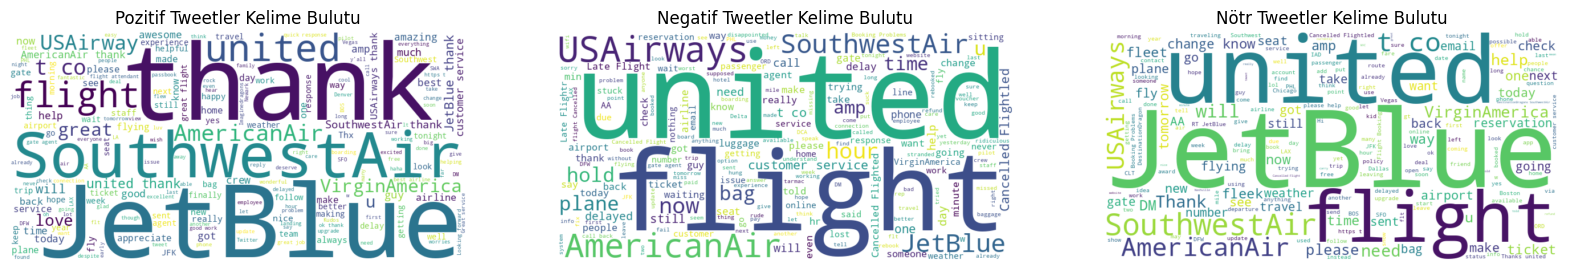

In [ ]:
# Kelime bulutlarını görselleştirme
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Pozitif Tweetler Kelime Bulutu')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negatif Tweetler Kelime Bulutu')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Nötr Tweetler Kelime Bulutu')
plt.axis('off')
plt.show()

In [ ]:
#Duygu Analizi
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Tweetlerin metinlerine duygu analizi uygulama
def analyze_sentiment (text):
  analysis=TextBlob(text)
  return analysis.sentiment.polarity , analysis.sentiment.subjectivity

In [ ]:
data['polarity'] , data['subjectivity']=zip(*data['text'].apply(analyze_sentiment))

In [ ]:
# VADER kullanarak duygu analizi
sid=SentimentIntensityAnalyzer()
data['vader_sentiment']=data['text'].apply(lambda text: sid.polarity_scores(text)['compound'])

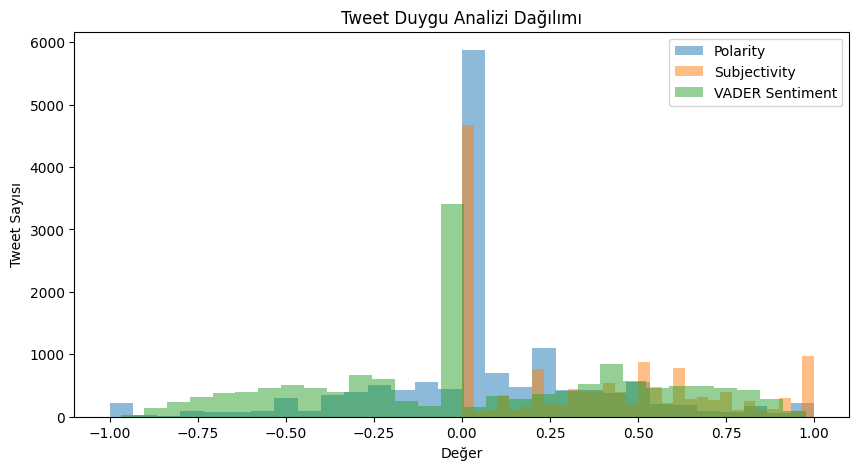

In [ ]:
# Duygu analizinin sonuçlarını görselleştirme
plt.figure(figsize=(10, 5))
plt.hist(data['polarity'], bins=30, alpha=0.5, label='Polarity')
plt.hist(data['subjectivity'], bins=30, alpha=0.5, label='Subjectivity')
plt.hist(data['vader_sentiment'], bins=30, alpha=0.5, label='VADER Sentiment')
plt.legend(loc='upper right')
plt.title('Tweet Duygu Analizi Dağılımı')
plt.xlabel('Değer')
plt.ylabel('Tweet Sayısı')
plt.show()

In [ ]:
# Polarity ve subjectivity ortalamalarını hesaplama
print('Ortalama Polarity:', data['polarity'].mean())
print('Ortalama Subjectivity:', data['subjectivity'].mean())
print('Ortalama VADER Sentiment:', data['vader_sentiment'].mean())

Ortalama Polarity: 0.049011548528188655
Ortalama Subjectivity: 0.360960835657335
Ortalama VADER Sentiment: 0.05246341530054646


In [ ]:
#En Aktif Kullanıcılar:
active_user=data['name'].value_counts().head(10)

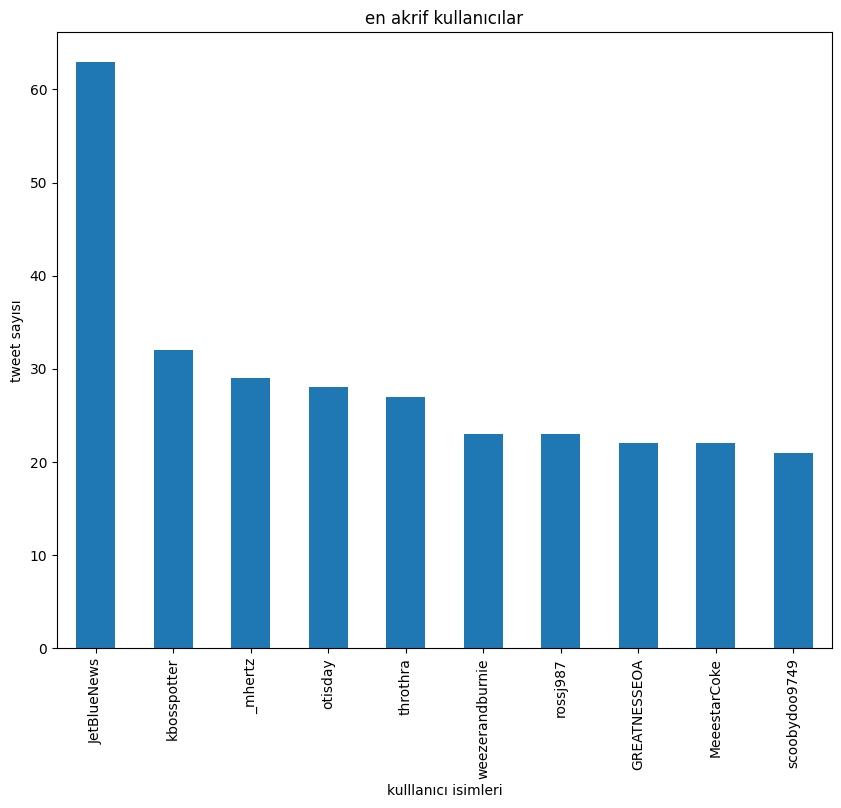

In [ ]:
plt.figure(figsize=(10,8))
active_user.plot(kind='bar')
plt.title('en akrif kullanıcılar')
plt.xlabel('kulllanıcı isimleri')
plt.ylabel('tweet sayısı')
plt.show()

In [ ]:
#En Çok Etkileşim Alan Kullanıcılar:
# En çok etkileşim alan kullanıcıları belirleme
interaction_user=data.groupby('name')['retweet_count'].sum().sort_values(ascending=False).head(10)

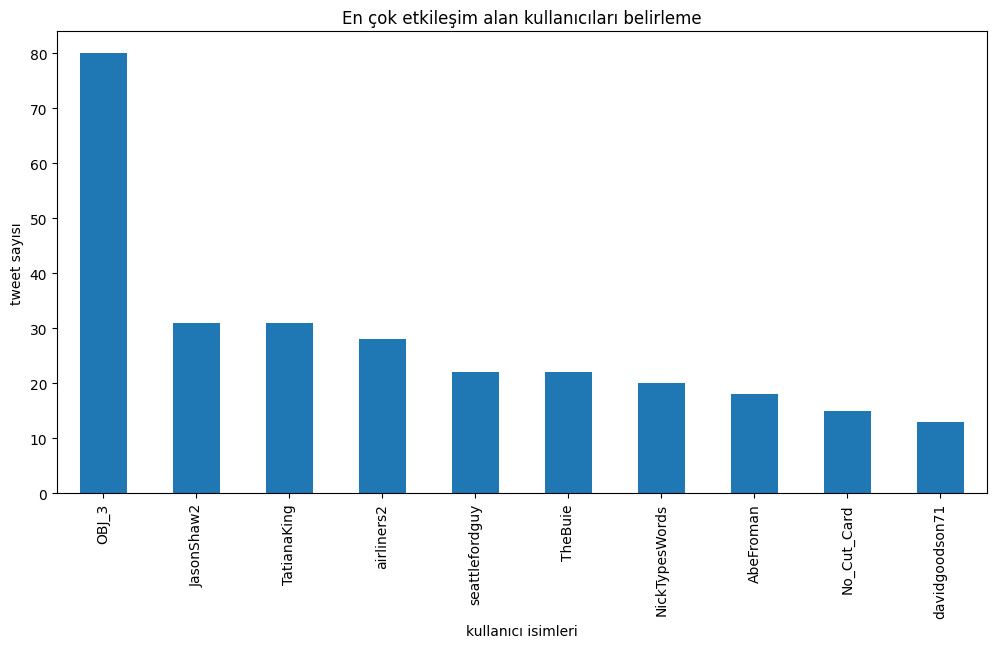

In [ ]:
plt.figure(figsize=(12,6))
interaction_user.plot(kind='bar')
plt.title('En çok etkileşim alan kullanıcıları belirleme')
plt.xlabel('kullanıcı isimleri')
plt.ylabel('tweet sayısı')
plt.show()

In [ ]:
#Kullanıcı İsimleri Analizi:
# Kullanıcı isimlerinin frekans analizi
name_frequens=data['name'].value_counts()

In [ ]:
# En sık kullanılan ilk 20 kullanıcı ismi
top_names=name_frequens.head(20)

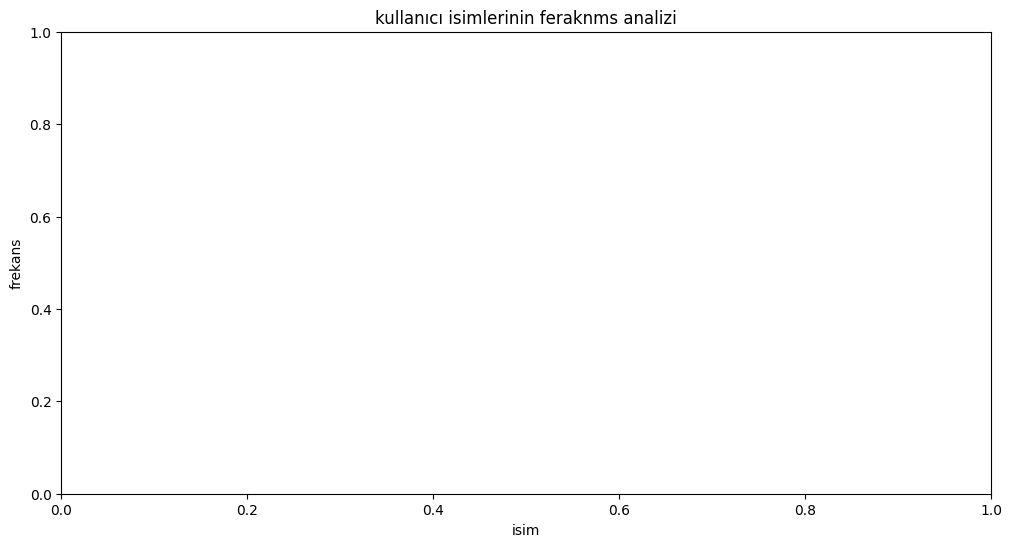

In [ ]:
plt.figure(figsize=(12,6))
plt.title('kullanıcı isimlerinin feraknms analizi')
plt.xlabel('isim')
plt.ylabel('frekans')
plt.show()


In [ ]:
#Bu kodun amacı, veri setindeki tweet_id sütunundaki tekrarlanan satırları
# bulup onları sıralamak ve sonrasında bu tekrarlanan satırların kaç tane olduğunu göstermektir.
duplicateDFRow = data[data.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

<ipython-input-79-71f029f897bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicateDFRow.sort_values("tweet_id", inplace = True)


(72, 15)

In [ ]:
duplicateDFRow.head(6)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12001,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12162,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12159,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11998,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11997,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
12158,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)


In [ ]:
#Tekrarlanan satırların kaldırılması, veri setindeki aynı verilerin birden fazla kez yer almasını önler.
#removing duplicates
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
data.shape

(14604, 15)

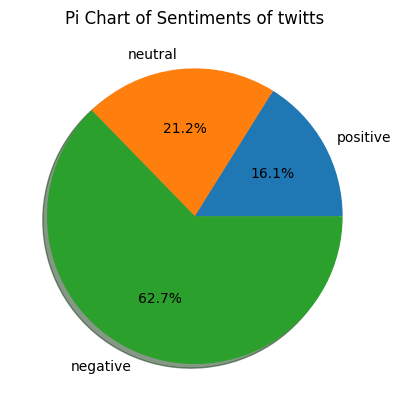

In [ ]:
ST = data.groupby('airline_sentiment').agg('count')
plt.pie(ST.tweet_id.sort_values(), labels=ST.tweet_id.sort_values().index,autopct='%1.1f%%', shadow=True )
plt.title("Pi Chart of Sentiments of twitts")
plt.show()

Text(0.5, 1.0, 'Number of tweets for every Airline')

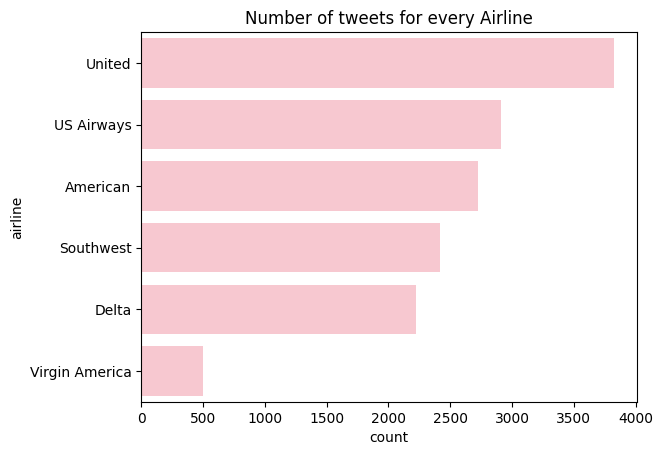

In [ ]:
sns.countplot(data=data,y=data['airline'],color='pink',order = data['airline'].value_counts().index).set_title('Number of tweets for every Airline')

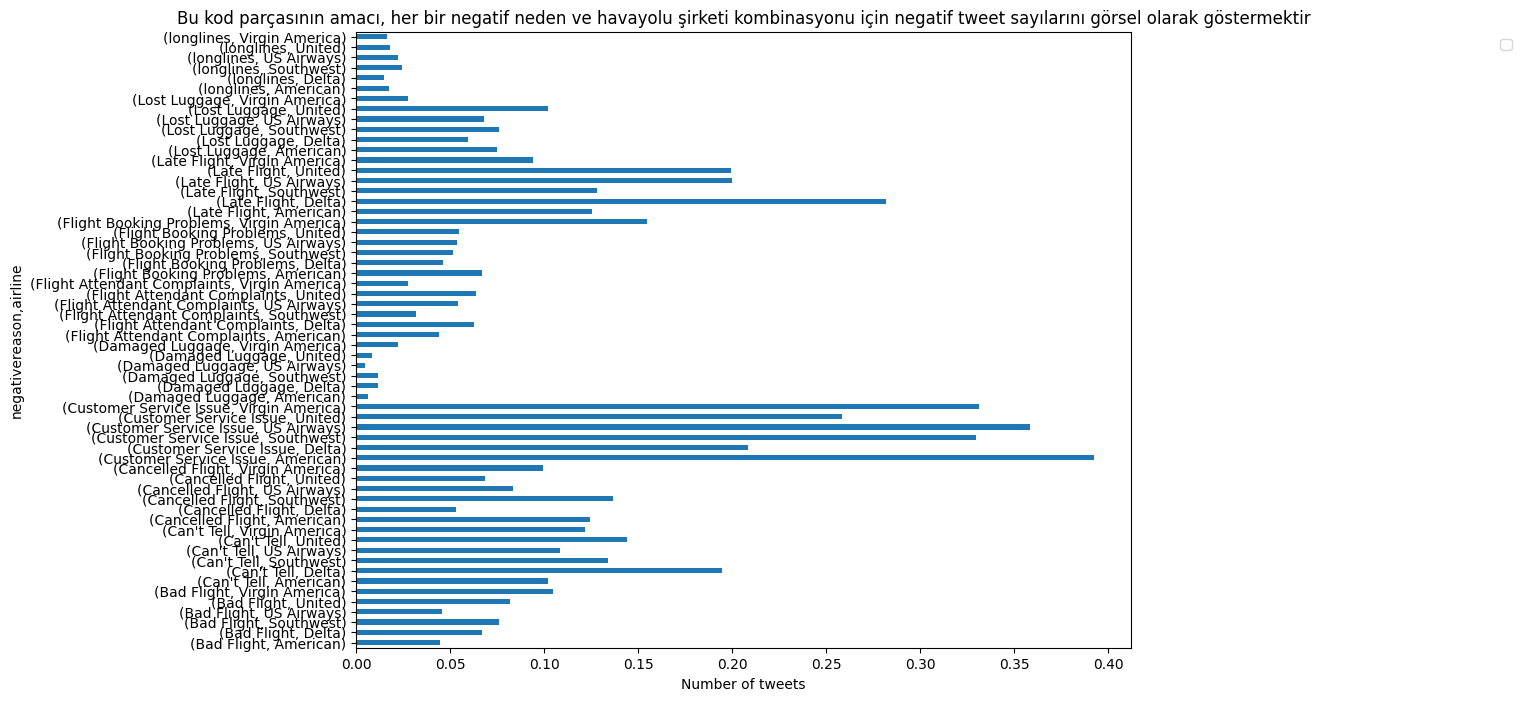

In [ ]:
if types.shape[0] < 500:
#types = data.groupby("negativereason")['airline'].value_counts(normalize=False).sort_index()
  plt.figure(figsize=(10, 8))
  types.unstack().plot(kind='barh', stacked='True')
  plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
  plt.xlabel('Number of tweets')
  plt.title('Bu kod parçasının amacı, her bir negatif neden ve havayolu şirketi kombinasyonu için negatif tweet sayılarını görsel olarak göstermektir')
else :
  print("Types DataFrame has more than 500 rows.")

Text(0.5, 1.0, 'her havayolu şirketi için negatif nedenlerin yüzde olarak dağılımını görsel olarak göstermektir')

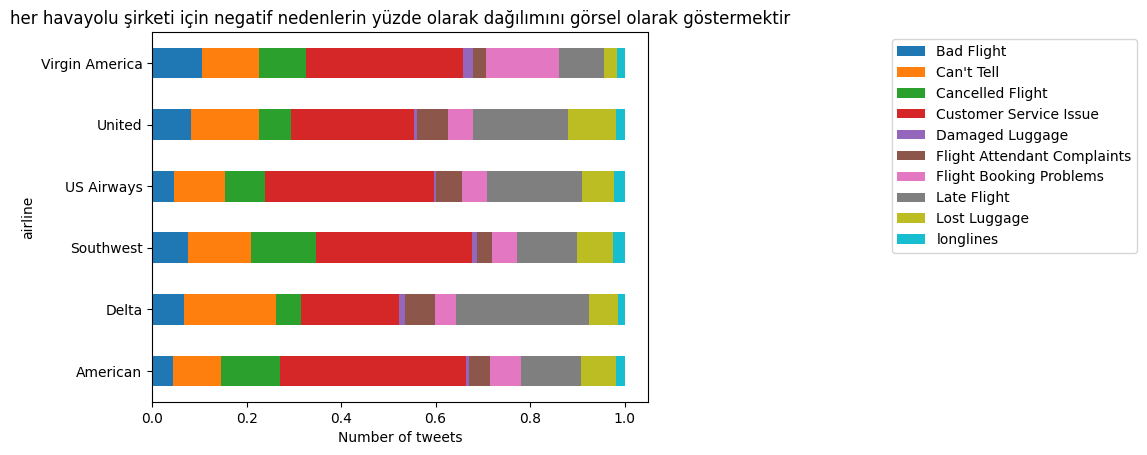

In [ ]:
types = data.groupby("airline")['negativereason'].value_counts(normalize=True).unstack()
types.plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(2, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('her havayolu şirketi için negatif nedenlerin yüzde olarak dağılımını görsel olarak göstermektir')

In [ ]:
import folium
import re
myCord=data['tweet_coord'].dropna().tolist()
Num=re.findall(r"[-+]?\d*\.\d+|\d+", myCord[0])
map1 = folium.Map(location=[Num[0],Num[1]], zoom_start=2)
for i in range(1, len(myCord)):
    Num=re.findall(r"[-+]?\d*\.\d+|\d+", myCord[i])
    folium.Marker([Num[0],Num[1]], icon=folium.Icon(color='red', icon='glyphicon glyphicon-user',size=2)).add_to(map1)
map1

In [ ]:
data=data.drop(['tweet_coord'],axis=1)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Remove @ with Airline names
data['text']=data['text'].str.replace('@VirginAmerica','')
data['text']=data['text'].str.replace('@united','')
data['text']=data['text'].str.replace('@SouthwestAir','')
data['text']=data['text'].str.replace('@JetBlue','')
data['text']=data['text'].str.replace('@AmericanAir','')
data['text']=data['text'].str.replace('@USAirways','')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experien...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didn't today... Must mean I need to take an...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it's really aggressive to blast obnoxious ""en...",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
